### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2020 ###

# Badger Delivery Optimization #

#### Simeng Li (sli589@wisc.edu), Sunjun Gu (sgu59@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
  1. [Introduction of Badger Delivery](#1.A.-Introdution-of-badger-delivery)
  2. [Data processing](#1.B.-Data-processing)
1. [Mathematical Model](#2.-Mathematical-model)
  1. [Modeling Assumptions and Parameters](#2.A.-Modeling-Assumptions-and-Parameters)
  2. [Decision Variables](#2.B.-Decision-Variables)
  3. [Constraints](#2.C.-Constraints)
  4. [Objective](#2.D.-Objective)
  5. [Standard Form](#2.E.-Standard-Form)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [When input changes](#4.A.-When-input-changes)
     1. [When d changes](#4.A.a.-When-d-changes)
     2. [When cost changes](#4.A.b.-When-cost-changes)
     3. [When lamda changes](#4.A.c.-When-lamda-changes)
     4. [When R1 changes](#4.A.d.-When-R1-changes)
  2. [Limitations](#4.B.-Limitations)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##
### 1.A. Introdution of badger delivery ###
Starting from November last semester, a white robot car appeared in the streets of UW-Madison campus. They lined up neatly and set off in different directions. It turns out that this is a meal delivery service provided by the Starship robot, and online meal ordering service is provided through GrubHub or Starship Deliveries applications, and the school canteen makes food. They jointly started the automatic meal delivery service. 

Up to now, the school canteen has 30 such white meal delivery robots. They depart from UW-Madison's Carson's Market, Four Lakes Market, Liz's Market, and Gordon, and deliver catering to the campus at pedestrian walking speed (about 4mph). The 20 student residences even include Eagle Heights and parts of the campus near the southeast. After completing the order, the user can watch the real-time position of the robot through the application. When the robot arrives, the user will receive a prompt that they can meet the robot and unlock their orders through the application. For the food safety of users, generally a robot can deliver an order, and a robot can hold up to 20 pounds of food, fully satisfying the demand of an order. In addition, the cost of each on-demand delivery is only $ 1.99, and Wiscard can be used in addition to credit cards, so that students in dormitories can use their food account and use the price discount of residents. 

This food delivery service is becoming more and more popular in schools. According to Peter Tester, director of catering and culinary services at the UW-Madison, in the first half of this semester, when nearly 7,800 people lived in dormitories, the university received about 400 orders a day. If this semester continues normally, he expects to have more than 500 orders per day. Compared with other food delivery services, this food delivery service has a lower price, and can use student discounts, as well as long-term study courses (when students do not want to leave the library) or the desire for snacks late at night, which all make it believable that Starship delivery will become popular among all UW-Madison students, especially in resident students. 

However, when the orders increase significantly, it is necessary to help canteens to design a meal delivery schedule for each time period of each day to satisfy students' demands and decide the robots' number to meet the requirement for delivery.

![fixit flowchart][flow]

[flow]: https://badgerherald.com/wordpress/wp-content/uploads/2019/11/IMG_7999.jpg


### 1.B. Data processing###
The collection of data is a great difficulty for us. We tried to contact the school cafeteria supervisor by phone, email, etc. to obtain their current number of online orders for resident students on different periods. But due to COVID-19, we did not receive any relevant reply and data. So we searched the relevant data and made the corresponding processes to obtain a reasonable number of orders for different resident halls in each period. At the same time, considering the widespread popularity of robotic meal delivery in the future, we believe that each canteen should have the capacity to undertake large-scale ordering.

1. Search the distance between a canteen and different dormitory within the food delivery range. If the distance is too short (less than 0.1mile), we do not think that students will make online reservations from these canteens (R ’).

2. Search the number of residents in each dormitory R (excluding R ’) within the food delivery range.

3. Multiply the number of R residents in different dormitories by 400 / (the number of R residents-the number of R ’residents) is the total number of orders per day for each dormitory at this stage O.

4. Considering the popularity of the service in the future, we will multiply the total order for each dormitory by 5 times to expand the order size.

5. Considering that the meal delivery service is mainly distributed at noon and evening, we divide the meal delivery period into 10:00, 10:30, 11:00, 11:30, 12:00, 12:30 , 13:00, 13:30, 14:00, evening from 16:00 to 20:00, similar to the situation at noon.

6. By searching relevant materials, it is found that the distribution of take-out orders in each time period is similar to the normal distribution curve, so the daily orders of different quarters are divided by 2 and distributed according to the normal function to get the noon hour and the time of different quarters. The number of orders is similar at night and at noon.

## 2. Mathematical model ##
For the UM-Madison cafeteria robots, they have operational costs (ie, delivery costs, machine maintenance costs, etc.), so they need to minimize the number of robots; at the same time, they also need to try to meet the students' order requirements (that is, deliver student orders in a short time). More importantly, with the increasing popularity of this delivery service in schools, each canteen must be able to undertake a large number of orders. So in this section, we will  build mathematical model about how to send orders to each dormitory at different periods and how to decide the number of robots with minimiing cost requirements and maximing customer satisfaction(Equal to minimize delivery time).

First of all, this problem needs to minimize cost requirements and maximize customer satisfaction(Equal to minimize delivery time), as well as the constraints of different dormitory order requirements at every period, so this is a **Liner Programs**.

In addition, in this problem, the cafeteria and each dormitory are similiar to nodes. At each period, the cafeteria will deliver robots to different dorms, and the number of delivery robots at this period will affect the number of delivery robots that can be available at the next moment, which in turn will affect the time when customers receive their orders, that is, customer satisfaction. So this is also a **Network Flow** problem.

Moreover, we want to minimize cost requirements and maximize customer satisfaction(Equal to minimize delivery time) at the same time, which requires some trade-offs, and this trade-off is ultimately determined by the cafeteria, and to achieve a balance between cost and satisfaction, from this aspect, this problem is a **Least Square and Trade-Offs** problem as well.

And since the number of orders and shipping robots are integers, there are no half orders or half robots, so our question is an integer question, and the answer we want to get is also an **integer**.

### 2.A. Modeling Assumptions and Parameters
1. In this model, we only consider the delivery situation of Four Lake canteen when the demand has increased by five times. The delivery situation of other canteen can be referred to this model.


2. In this model, we only consider that every half hour from 10:00 to 14:00 which belongs to a period, and the dinner delivery is similar to that at noon.


3. $R1$ from file 'data_fourLake', is the number of orders for each dormitory at each time period


4. $p, d$ from size(R1), p for the time period,q for the dormitory


5. $time$ from file 'dist_four', represents the time it takes to get to and from a particular dorm


6. $d$ which means that after the end of operation time, all orders can be completed in d time periods


7. $cost$ represents the operating cost of each robot


8. $period = [1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 3]$  indicating that the canteen and different dormitories can complete the delivery within several periods (one period is 30 minutes).


9. $\lambda$  trade-off parameter, the bigger it is, the more importance it attaches to customer satisfaction, and the smaller it is, the more importance it attaches to operation cost

### 2.B. Decision Variables
1. In the period of 1 - (p + d), the number of robots sent by four lake restaurant to the dormitory of 1-q**
$$
\begin{aligned}
X_{p+d,q} (Int,Nonnegative)
\end{aligned}
$$


2. The number of robots returning from 1-q dormitory to four lake restaurant in a period of 1 - (p + d)
$$
\begin{aligned}
Y_{p+d,q} (Int,Nonnegative)
\end{aligned}
$$


3. The number of robots available at four lake restaurant in a period of 1 - (p + d)
$$
\begin{aligned}
Cur_{p+d} (Int,Nonnegative)
\end{aligned}
$$


4. The accumulated order quantity of 1-q dormitory in the period of 1- (p+d) (the order quantity of this period + the order quantity not delivered in time)
$$
\begin{aligned}
Order_{p+d,q} (Int,Nonnegative)
\end{aligned}
$$


5. Number of robots
$$
\begin{aligned}
Robot (Int)
\end{aligned}
$$


6. Within a period of 1- (p+d), binary variable is used to indicate when the robot stops working and all orders are dispatched to facilitate the accounting of operating costs. 0 when current period has orders left, 1 when not
$$
\begin{aligned}
OrderBin_{p+d} (Bin)
\end{aligned}
$$


### 2.C. Constraints
1.All the order must be delivered 
$$
\begin{aligned}
\sum_{i=1,j=1}^{p+d,q}X_{i,j} = \sum_{p,q}R1_{p,q}
\end{aligned}
$$



2.All orders for each dormitory must be delivered
$$
\begin{aligned}
\sum_{q}X_{p+d,q} = \sum_{q}R1_{p,q}
\end{aligned}
$$



3.Limitations on available robots for each time period.

**a.** Initialize the variables of available robots, that is, all robots are available in the initial period
$$
\begin{aligned}
Cur_{1} = Robot
\end{aligned}
$$


**b.** The number of robots available in each time period shall not exceed the number of robots available
$$
\begin{aligned}
Cur_{i} \le Robot && i=1,\dots,p+d
\end{aligned}
$$


**c**. The number of robots dispatched at a certain time cannot exceed the number of robots available at that time
$$
\begin{aligned}
\sum_{q}X_{i,k} \le Robot && i=1,\dots,p+d
\end{aligned}
$$


**d**.The number of robots returned in a certain period cannot exceed the number of robots available in that period
$$
\begin{aligned}
\sum_{q}Y_{i,k} \le Robot && i=1,\dots,p+d
\end{aligned}
$$



4.For each period, each dormitory accumulative order limitation.

**a**. Initialize the accumulated order quantity. In the first period, the accumulated order quantity is the order itself
$$
\begin{aligned}
\sum_{q}Order_{1,k} = \sum_{q}R1_{1,k}
\end{aligned}
$$


**b**. For each time period, when the number of orders left = 0, bin = 1; Orders left = 1, bin = 0
$$
\begin{aligned}
OrderBin_{i} \times \sum_{q}Order_{i,k}  = 0 && i=1,\dots,p+d-1
\end{aligned}
$$


**c**. The number of robots sent to different dormitories in each time period cannot exceed the number of orders accumulated in that time period
$$
\begin{aligned}
X_{i,j} \le Order_{i,j} && i=1,\dots,p+d  && j=1,\dots,q
\end{aligned}
$$


**d**. During the operation period, the cumulative order quantity in the next period is the sum of the order quantity not issued at this time and the order quantity at the next time
$$
\begin{aligned}
Order_{i+1,j} = Order_{i,j} + R1_{i+1,j} - X_{i,j} && i=1,\dots,p+d  && j=1,\dots,q
\end{aligned}
$$


**e**. After the end of the operation period, there are no new orders, so only orders that have not been sent before need to be completed
$$
\begin{aligned}
Order_{i+1,j} = Order_{i,j} - X_{i,j} && i=1,\dots,p+d  && j=1,\dots,q
\end{aligned}
$$



5.For each time period, the limit of the number of robots returning to the canteen from different dormitories.


**a**. In the first phase of initialization, the number of robots returning from the dormitory is zero, that is, no machines were sent out at the beginning, so no robots returned.
$$
\begin{aligned}
Y_{1,j} =0 && j=1,\dots,q
\end{aligned}
$$


**b**. If the robot's round-trip time between a certain dormitory and canteen is I period (30min is one period), then no robot will return within these periods.
$$
\begin{aligned}
Y_{i,j} = 0 && i=1,\dots,p+d  && j=1,\dots,q
\end{aligned}
$$


**c**. the for the case that start getting carts back from that dorm, the number of them should be in a certain period of time before sending the number of robots.
$$
\begin{aligned}
Y_{i,j} = X_{(i-Period_j),j} && i=1,\dots,p+d  && j=1,\dots,q
\end{aligned}
$$




### 2.D. Objective 
For the canteen, the hope is to minimize operating costs and improve customer satisfaction, that is, reduce customer waiting time, to find a balance between the two requirements.
1. The working time of the robot can be found through OrderBin to the time period when the robot's work ends, which is the operation cost multiplied by the number of robots and the working cost.

$Formulation1:$
$$
\begin{aligned}
\sum_{i=1}^{p+d}({Robot \times Cost \times 30 \times \sum_{l=1}^{p+d}{p+d-OrderBin_{l}}})
\end{aligned}
$$


2. Total customer satisfaction is related to their total wait time. Since the delivery time between the canteen and the dormitory is fixed, and the delivery order of the restaurant is at the beginning of each time period, we only need to find the total amount of time delayed by the restaurant, plus the fixed delivery time, that is, the total waiting time of the customer.

$Formulation2:$
$$
\begin{aligned}
\lambda \times ({ \sum_{i=1,j=1}^{p+d,q}{X_{i,j} \times i \times 30 + time_{j,1}} - \sum_{i=1,j=1}^{p,q}{R1_{i,j} \times\ i \times 30}})
\end{aligned}
$$

Therefore, the objective is
$$
\begin{aligned}
Formulation1 + Formulation2
\end{aligned}
$$



### 2.E. Standard Form
$$
\begin{aligned}
\underset{x,y,robot,order \ge 0 , oderbin \in {0,1} }{\text{minimize}}\qquad& \sum_{i=1}^{p+d}({Robot \times Cost \times 30 \times \sum_{l=1}^{p+d}{p+d-OrderBin_{l}}}) +  \lambda \times ({ \sum_{i=1,j=1}^{p+d,q}{X_{i,j} \times i \times 30 + time_{j,1}} - \sum_{i=1,j=1}^{p,q}{R1_{i,j} \times\ i \times 30}})\\
\text{subject to:}\qquad&
\sum_{i=1,j=1}^{p+d,q}X_{i,j} = \sum_{i=1,j=1}^{p,q}R1_{i,j}
\\
& Cur_{1} = Robot \\
& Cur_{i} \le Robot && i=1,\dots,p+d \\
& \sum_{k=1}^{q}X_{i,k} \le Robot && i=1,\dots,p+d \\
& \sum_{k=1}^{q}Order_{1,k} = \sum_{k=1}^{q}R1_{1,k} \\
& OrderBin_{i} \times \sum_{k=1}^{q}Order_{i,k}  = 0 && i=1,\dots,p+d-1 \\
& X_{i,j} \le Order_{i,j} && i=1,\dots,p+d  && j=1,\dots,q \\
& Order_{i+1,j} = Order_{i,j} + R1_{i+1,j} - X_{i,j} \quad   (when\ i<p )&& i=1,\dots,p+d  && j=1,\dots,q \\
& Order_{i+1,j} = Order_{i,j} - X_{i,j}    \quad (when \ i>=p ) && i=1,\dots,p+d  && j=1,\dots,q \\
& Y_{1,j} =0 && j=1,\dots,q \\
& Y_{i,j} = 0   \quad ( when \ Period_j >= i) && i=1,\dots,p+d  && j=1,\dots,q \\
& Y_{i,j} = X_{(i-Period_j),j} \quad (when \ 0< Period_j < i)&& i=1,\dots,p+d  && j=1,\dots,q \\
\end{aligned}
$$


## 3. Solution ##

First, complete the input, including the reading of the data file and the naming and definition of the associated constants.

In this part, we value **d = 3**， that is, the delivery of all orders and the return of robots must be completed within 1.5 hours after the end of lunch at 14:00 and 0.5 hours before the beginning of dinner orders at 16:00. This value is reasonable and in line with the general restaurant requirements. 

We value **cost = 1**,that is, the cost of operation for each robot in one time period.This number may vary as prices change, in terms of sensitivity we'll talk about later.

We value **lamda = 100**,that is, the weight of satisfaction compared to the cost (higher the lamda, higher the weight of satisfaction), in terms of sensitivity we'll talk about later.


In [1]:
using JuMP, Gurobi, CSV, LinearAlgebra
# UW has access to a  fleet of 30 robots
num_robot = 90
# a robot can carry up to 20 pounds of food.
carry_up = 30
# one time the delivery fee is 1.99
delivery_fee = 1.99
# robots move at pedestrian speed
#robots_ speed = 4
# total carry
R1 = CSV.read("data_fourLake.csv")
(p,q) = size(R1)
time = CSV.read("dist_four.csv")
d = 3   # number of time periods added after all the orders have been received by cafeteria (To help find optimal solution)
cost = 1  # cost of operation for each robot in one time period
lamda = 100  # the weight of satisfaction compared to the cost (higher the lamda, higher the weight of satisfaction)
time_total = CSV.read("dist_four_final.csv")
period = [1 2 0 0 2 0 1 1 2 0 2 1 2 2 3] # number of period for making deliveries to 
R1

,Adams,Barn&ChadBradley,Column3,Cole&Sull,Dav&Sell,Dejo&Phi,Dejo&Phi_1,Kronshage
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,3,0,0,2,0,2,3
2,2,6,0,0,3,0,3,5
3,4,12,0,0,5,0,5,10
4,7,20,0,0,8,0,9,17
5,9,25,0,0,11,0,12,21
6,9,25,0,0,11,0,12,21
7,7,20,0,0,8,0,9,17
8,4,12,0,0,5,0,6,10
9,2,6,0,0,3,0,3,5


In this part, we've done all of the codification of variables, constraints, and objectives.


We finally get an optimal number of robots and a timetable for the canteen to deliver orders at different periods under these constraints.

In [6]:
using JuMP, Gurobi
m = Model(with_optimizer(Gurobi.Optimizer,OutputFlag=0))

# m = residence hall number;
# n = time period;

@variable(m, x[1:(p+d),1:q]>=0,Int) # number of carts sent to each residential halls in each tme period
@variable(m, y[1:(p+d),1:q]>=0,Int) # number of carts back from each residential halls in each time period
@variable(m, cur[1:(p+d)]>=0, Int) # number of currently available carts
@variable(m, order[1:(p+d), 1:q] >= 0, Int) # number of orders in cumulation
# number of robots assigned to the day, and binary variable indicating when the robots can stop working 
@variable(m, robot, Int)
@variable(m, order_bin[1:(p+d)], Bin) # 0 when current period has orders left, 1 when not# 多少个cycle可以乘以cost

# all the orders must be delivered
@constraint(m, sum(x[i, j] for i =1:(p+d), j = 1:q) == sum(R1[i,j] for i = 1:p, j = 1:q))
for i = 1:(p+d)
    # the available carts in each time period <= total number of robots
    @constraint(m, cur[i] <= robot)
    #in each time period, the number of carts sent out is smaller than the currently available carts
    @constraint(m,sum(x[i,:]) <= cur[i]);
end

for j = 1:q
    #all the orders in each residential halls must be delivered.
   @constraint(m, sum(x[:,j]) == sum(R1[:,j])) 
end
for i = 1:(p+d-1)
     # when the number of orders left = 0, bin = 1; orders left = 1, bin = 0
     @constraint(m, order_bin[i]*sum(order[i,:]) == 0)
    # number of cars available in cycle (i+1) = number of available carts in cycle (i) + number of carts back in cycle (i) - 
    # number of carts sent out in cycle (i)
     @constraint(m, cur[i+1] == cur[i] + sum(y[i+1, j] for j = 1:q) - sum(x[i,j] for j = 1:q)) # set current available robots
     for j = 1:q
        #number of carts go out <=number of culmulative orders for each residential hall
        @constraint(m, x[i,j] <= order[i,j])
        if i < p # when there are still incoming orders
            #number of orders in cumulation in cycle (i+1) = number of orders in cumulation in cycle(i) 
            #+ number of orders arrive in cycle (i+1) - number of cycles sent out in cycle i.
             @constraint(m, order[i+1,j] == order[i, j] - x[i, j] + R1[i+1,j]) 
        else 
            # number of orders in cycle i+1 = number of orders in cumulation in cycle(i) - number of cycles sent out in cycle i
             @constraint(m, order[i+1,j] == order[i, j] - x[i, j])
        end
    end
end


for l = 1:q
      #set up the number of cumulative orders in the first time period
      @constraint(m, order[1,l] == R1[1,l])
end


# set up current available robots
@constraint(m, cur[1] == robot)
# constraint to make the robots be back at the right time
for i = 1:(p+d-1) 
      for j=1:q
        #set up the number of carts back from each residential hall (0)
            @constraint(m, y[1 ,j] == 0)
            if (period[j] > 0)
                  if (period[j] >= i)   
                        @constraint(m, y[i,j] == 0)   # the first several cycles are definitely 0    
                  else
                        # for the case that start getting carts back from that dorm
                        @constraint(m, y[i,j] == x[(i-period[j]),j]) # when the cart is back
                  end
            else
                  @constraint(m, y[i,j] == 0)
            end
      end
end

@objective(m, Min, sum(robot*cost*30*sum((p+d-order_bin[l]) for l = 1:(p+d)) for i = 1:(p+d)) + 
                lamda*(sum((x[i,j]*i*30 + time[j,1]) for i = 1:(p+d), j = 1:15) - sum(R1[i,j]*i*30 for i = 1:p, j = 1:q)))
optimize!(m)
result = value.(x)
println()
println("The number of robots required is (when lamda = 100, d = 3, cost = 1): ", value(robot))
println("Below is the result of x1: ")
result

Academic license - for non-commercial use only
Academic license - for non-commercial use only

The number of robots required is (when lamda = 100, d = 3, cost = 1): 237.0
Below is the result of x1: 


12×15 Array{Float64,2}:
  1.0   3.0  0.0  0.0   2.0  0.0  …  -0.0   3.0   3.0   6.0   1.0    5.0
  2.0   6.0  0.0  0.0   3.0  0.0     -0.0   5.0   4.0  10.0   2.0    9.0
  4.0  12.0  0.0  0.0   5.0  0.0     -0.0  10.0   9.0  21.0   4.0   18.0
  2.0  20.0  0.0  0.0   8.0  0.0     -0.0  16.0  14.0  34.0   7.0   -0.0
 14.0  -0.0  0.0  0.0   9.0  0.0     -0.0  20.0  18.0  -0.0  -0.0   -0.0
  0.0  44.0  0.0  0.0   6.0  0.0  …  -0.0   3.0  18.0  40.0  18.0   -0.0
 16.0  17.0  0.0  0.0   8.0  0.0     -0.0  -0.0  14.0   6.0  -0.0   -0.0
  4.0  21.0  0.0  0.0  12.0  0.0     -0.0  32.0   0.0  95.0  11.0   -0.0
  2.0  -0.0  0.0  0.0  -0.0  0.0     -0.0  -0.0  13.0   6.0  -0.0   -0.0
 -0.0   6.0  0.0  0.0   3.0  0.0     39.0  16.0  -0.0   4.0   2.0  155.0
 -0.0  -0.0  0.0  0.0  -0.0  0.0  …  -0.0   0.0  -0.0  -0.0  -0.0   -0.0
 -0.0  -0.0  0.0  0.0  -0.0  0.0     -0.0  -0.0  -0.0  -0.0  -0.0   -0.0

By comparing the real students' orders in the timetable R1 and the optimal schedule given by us and the optimal number of robots given by us, the feasibility of the model and its strong application are illustrated.

## 4. Results and discussion ##

The feasibility of the model can be confirmed by comparing the results of the third section with R1.

In this section, we will discuss the sensitivity of the model, that is, how the results of the model change as different inputs change. We will also discuss the limitations of this model.

### 4.A. When input changes
we will discuss about the change of **d, cost, R1, lamda** and the give the plot to show how the objective result and robots' number change with lamda under different d, cost, R1 separately.

We add a new array R2, which is the modified version of R1 to test sensitiveness


In [3]:
using JuMP, Gurobi, CSV, LinearAlgebra
# UW has access to a  fleet of 30 robots
num_robot = 90
# a robot can carry up to 20 pounds of food.
carry_up = 30
# one time the delivery fee is 1.99
delivery_fee = 1.99
# robots move at pedestrian speed
#robots_ speed = 4
# total carry
R1 = CSV.read("data_fourLake.csv")
R2 = CSV.read("data_fourLake_new.csv") # the modified version of R1 to test sensitiveness
(p,q) = size(R1)
time = CSV.read("dist_four.csv")
#d = 3   # number of time periods added after all the orders have been received by cafeteria (To help find optimal solution)
#cost = 1  # cost of operation for each cart in one time period
time_total = CSV.read("dist_four_final.csv")
period = [1 2 0 0 2 0 1 1 2 0 2 1 2 2 3] # number of period for making deliveries to 
println()
println("R1 is printed below (the original data): ")
show(R1)
println()
println()
println("R2 is printed below (with several elements of second column modified compared to R1 to test sensitiveness): ")
show(R2)


R1 is printed below (the original data): 
9×15 DataFrames.DataFrame. Omitted printing of 9 columns
│ Row │ Adams │ Barn&ChadBradley │ Column3 │ Cole&Sull │ Dav&Sell │ Dejo&Phi │
│     │ Int64 │ Int64            │ Int64   │ Int64     │ Int64    │ Int64    │
├─────┼───────┼──────────────────┼─────────┼───────────┼──────────┼──────────┤
│ 1   │ 1     │ 3                │ 0       │ 0         │ 2        │ 0        │
│ 2   │ 2     │ 6                │ 0       │ 0         │ 3        │ 0        │
│ 3   │ 4     │ 12               │ 0       │ 0         │ 5        │ 0        │
│ 4   │ 7     │ 20               │ 0       │ 0         │ 8        │ 0        │
│ 5   │ 9     │ 25               │ 0       │ 0         │ 11       │ 0        │
│ 6   │ 9     │ 25               │ 0       │ 0         │ 11       │ 0        │
│ 7   │ 7     │ 20               │ 0       │ 0         │ 8        │ 0        │
│ 8   │ 4     │ 12               │ 0       │ 0         │ 5        │ 0        │
│ 9   │ 2     │ 6              

In [7]:
using JuMP, Gurobi

function delivery(lamda, d, cost)
    
m = Model(with_optimizer(Gurobi.Optimizer,OutputFlag=0))
# m = residence hall number;
# n = time period;
#lamda = 90  # the weight of satisfaction compared to the cost (higher the lamda, higher the weight of satisfaction)
@variable(m, x[1:(p+d),1:q]>=0,Int) # number of carts sent to each residential halls in each tme period
@variable(m, y[1:(p+d),1:q]>=0,Int) # number of carts back from each residential halls in each time period
@variable(m, cur[1:(p+d)]>=0, Int) # number of currently available carts
@variable(m, order[1:(p+d), 1:q] >= 0, Int) # number of orders in cumulation
# number of robots assigned to the day, and binary variable indicating when the robots can stop working 
@variable(m, robot, Int)
@variable(m, order_bin[1:(p+d)], Bin) # 0 when current period has orders left, 1 when not

# all the orders must be delivered
@constraint(m, sum(x[i, j] for i =1:(p+d), j = 1:q) == sum(R1[i,j] for i = 1:p, j = 1:q))
for i = 1:(p+d)
    # the available carts in each time period <= total number of robots
    @constraint(m, cur[i] <= robot)
    #in each time period, the number of carts sent out is smaller than the currently available carts
    @constraint(m,sum(x[i,:]) <= cur[i]);
end

for j = 1:q
    #all the orders in each residential halls must be delivered.
   @constraint(m, sum(x[:,j]) == sum(R1[:,j])) 
end
for i = 1:(p+d-1)
     # when the number of orders left = 0, bin = 1; orders left = 1, bin = 0
     @constraint(m, order_bin[i]*sum(order[i,:]) == 0)
    # number of cars available in cycle (i+1) = number of available carts in cycle (i) + number of carts back in cycle (i) - 
    # number of carts sent out in cycle (i)
     @constraint(m, cur[i+1] == cur[i] + sum(y[i+1, j] for j = 1:q) - sum(x[i,j] for j = 1:q)) # set current available robots
     for j = 1:q
        #number of carts go out <=number of culmulative orders for each residential hall
        @constraint(m, x[i,j] <= order[i,j])
        if i < p # when there are still incoming orders
            #number of orders in cumulation in cycle (i+1) = number of orders in cumulation in cycle(i) 
            #+ number of orders arrive in cycle (i+1) - number of cycles sent out in cycle i.
             @constraint(m, order[i+1,j] == order[i, j] - x[i, j] + R1[i+1,j]) 
        else 
            # number of orders in cycle i+1 = number of orders in cumulation in cycle(i) - number of cycles sent out in cycle i
             @constraint(m, order[i+1,j] == order[i, j] - x[i, j])
        end
    end
end


for l = 1:q
      #set up the number of cumulative orders in the first time period
      @constraint(m, order[1,l] == R1[1,l])
end


# set up current available carts
@constraint(m, cur[1] == robot)
# constraint to make the robots be back at the right time
for i = 1:(p+d-1) 
      for j=1:q
        #set up the number of carts back from each residential hall (0)
            @constraint(m, y[1 ,j] == 0)
            if (period[j] > 0)
                  if (period[j] >= i)   
                        @constraint(m, y[i,j] == 0)   # the first several cycles are definitely 0    
                  else
                        # for the case that start getting carts back from that dorm
                        @constraint(m, y[i,j] == x[(i-period[j]),j]) # when the cart is back
                  end
            else
                  @constraint(m, y[i,j] == 0)
            end
      end
end

@objective(m, Min, sum(robot*cost*30*sum((p+d-order_bin[l]) for l = 1:(p+d)) for i = 1:(p+d)) + 
                lamda*(sum((x[i,j]*i*30 + time[j,1]) for i = 1:(p+d), j = 1:15) - sum(R1[i,j]*i*30 for i = 1:p, j = 1:q)))
optimize!(m)
value.(cur)
result = value.(x)
robot_v = value(robot)
obj = objective_value(m)
    return robot_v, obj
end

delivery (generic function with 1 method)

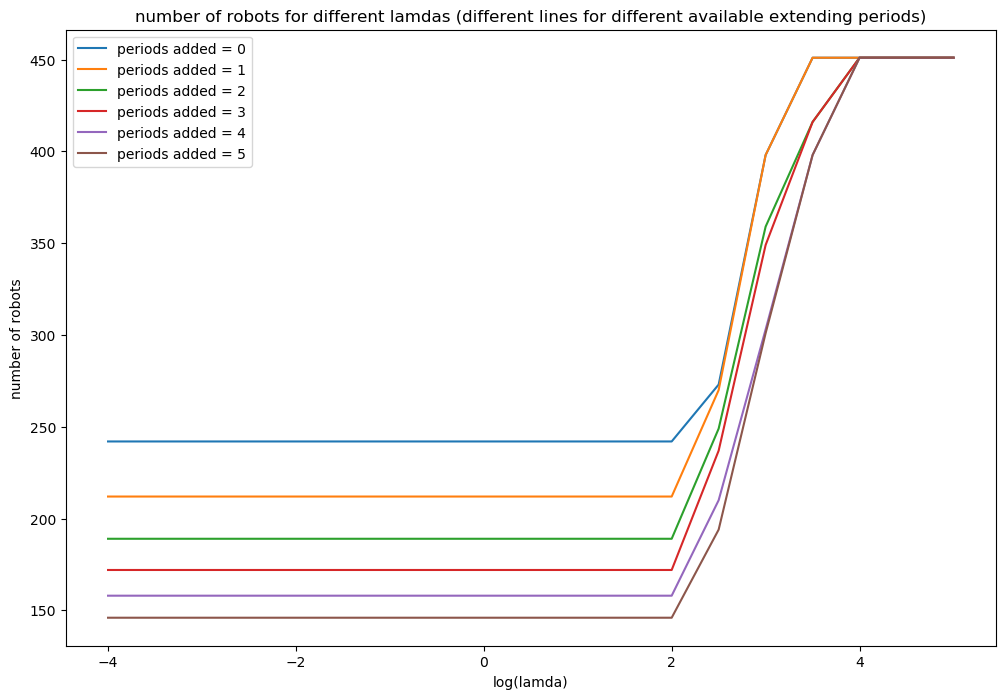

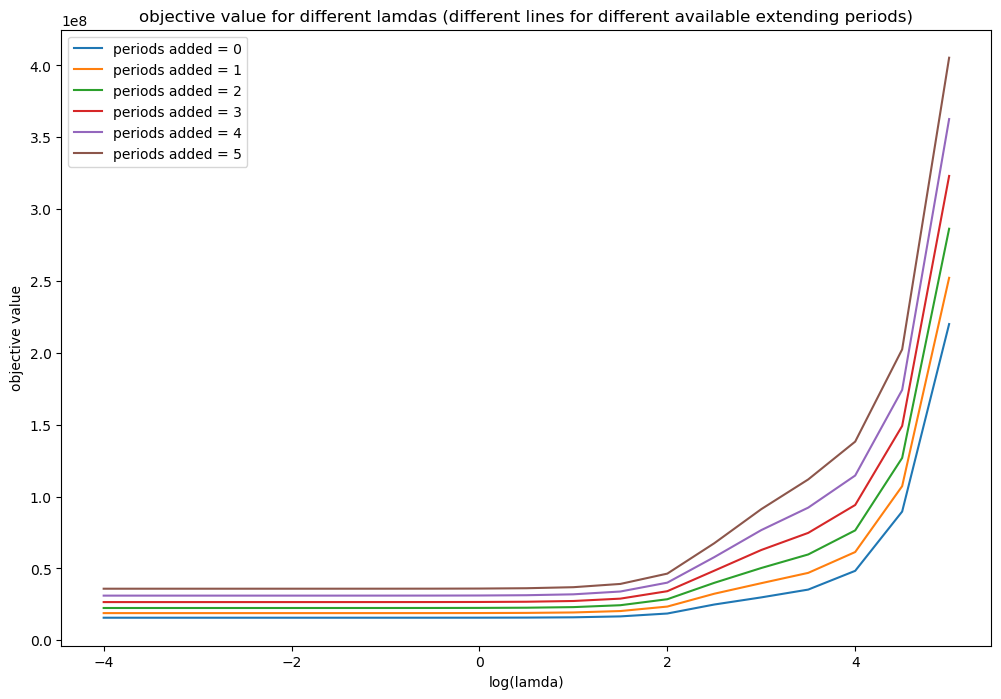

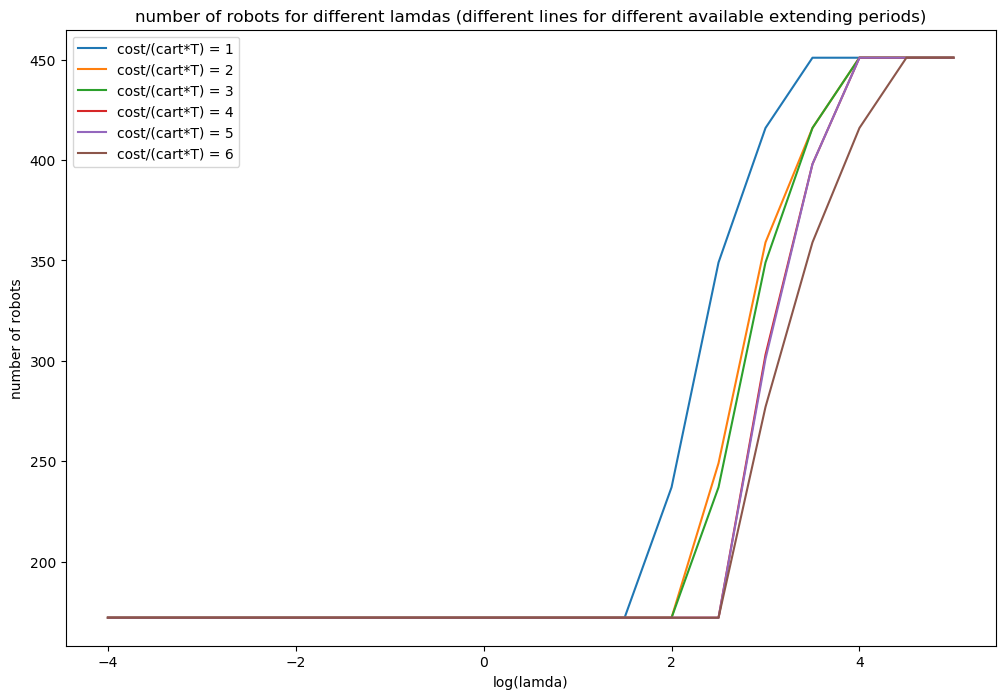

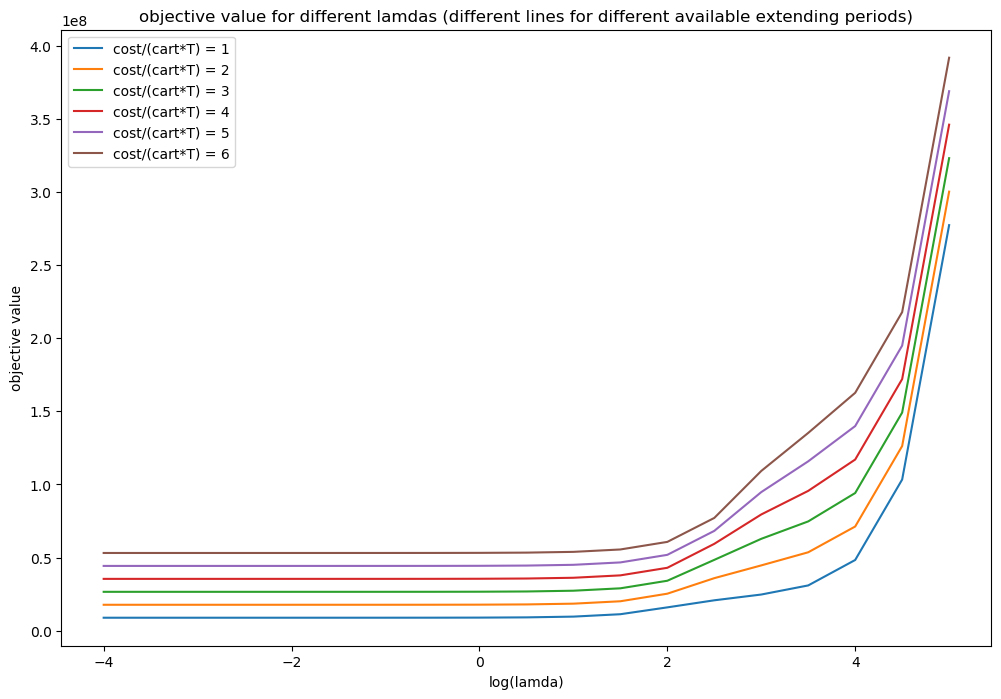

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

PyObject Text(0.5, 1, 'objective value for different lamdas (different lines for different available extending periods)')

In [8]:
using JuMP, Gurobi, PyPlot
lamda_ = [0.00001 0.0001 0.001 0.01 0.1 1 10 50 70 90 100 200 500 700 1000 10000]
lamda_log = -4:0.5:5
lamda_p = 10 .^ (lamda_log)
t = size(lamda_log)
#t = 16
d_p = [0 1 2 3 4 5]
cost_p = [1 2 3 4 5 6]
robot_all = zeros(19, 6) # 1st dimension for changing lamda, 2nd dimension for changing additional time periods
obj_all = zeros(19, 6)
robot_all_cost = zeros(19, 6)
obj_all_cost = zeros(19, 6)

for i = 1:19
   for j = 1:6
        robot_all[i,j], obj_all[i,j] = delivery(lamda_p[i], d_p[j], 3)
   end
end

for i = 1:19
   for j = 1:6
        robot_all_cost[i,j], obj_all_cost[i,j] = delivery(lamda_p[i], 3, cost_p[j])
   end
end

figure(figsize=(12,8))
for k = 1:6
    plot(lamda_log,robot_all[:,k]);
end

xlabel("log(lamda)"); ylabel("number of robots");
legend(["periods added = 0", "periods added = 1", "periods added = 2", 
        "periods added = 3", "periods added = 4", "periods added = 5"])
title("number of robots for different lamdas (different lines for different available extending periods)")

figure(figsize=(12,8))
for k = 1:6
    plot(lamda_log,obj_all[:,k]);
end

xlabel("log(lamda)"); ylabel("objective value");
legend(["periods added = 0", "periods added = 1", "periods added = 2", 
        "periods added = 3", "periods added = 4", "periods added = 5"])
title("objective value for different lamdas (different lines for different available extending periods)")

figure(figsize=(12,8))
for k = 1:6
    plot(lamda_log,robot_all_cost[:,k]);
end

xlabel("log(lamda)"); ylabel("number of robots");
legend(["cost/(cart*T) = 1", "cost/(cart*T) = 2", "cost/(cart*T) = 3", 
        "cost/(cart*T) = 4", "cost/(cart*T) = 5", "cost/(cart*T) = 6"])
title("number of robots for different lamdas (different lines for different available extending periods)")

figure(figsize=(12,8))
for k = 1:6
    plot(lamda_log,obj_all_cost[:,k]);
end

xlabel("log(lamda)"); ylabel("objective value");
legend(["cost/(cart*T) = 1", "cost/(cart*T) = 2", "cost/(cart*T) = 3", 
        "cost/(cart*T) = 4", "cost/(cart*T) = 5", "cost/(cart*T) = 6"])
title("objective value for different lamdas (different lines for different available extending periods)")

#### 4.A.a. When d changes
As can be seen from the first figure, **lamda<100**, that is, when the operating robot cost of the restaurant is more important than the satisfaction of students, the number of robots increases with the decrease of d, that is, the reduction of the working time of robots after lunch, and the number of robot among the satisfaction between **0.0001-100** remains fixed.


Increased importance in student satisfaction, especially in **lamda>100**, the number of robots increases sharply. When the importance of student satisfaction reaches **10,000**, the number of robots is fixed to a larger value no matter how d changes.


This chart shows the d, the number of time periods added after all the orders have been received by cafeteria after 14:00, which plays an important role in deciding how many robots should canteens buy. The more time periods, the less robots are needed.

#### 4.A.b. When cost changes
As can be seen from the second figure, around **lamda<100**, that is, when the operating robot cost of the restaurant is more important than the satisfaction of students, the change in the operating cost of the restaurant will hardly cause the change in the number of robots, they always keep the same fixed value.


The importance of student satisfaction increases, especially in **lamda>100**, the number of robots increases sharply, and when the operating robot cost is high, the demand for robots is less than when the operating cost robot is low.


When the importance of student satisfaction reaches **10,000**, the number of robots is fixed to a larger value regardless of how the operating costs change.


This graph illustrates the impact of operating costs on the demand for robots. When the situation is too extreme, that is, the restaurant is too concerned about its own interests, or the restaurant is too concerned about students' satisfaction, the operating robot cost will not affect the number of robots. When restaurants want to find a balance between benefits and student satisfaction, it will have an huge impact. The higher the operating cost, the smaller the demand for robots.

#### 4.A.c. When lamda changes

In [9]:
## Version of print the schedule for different lamda
using JuMP, Gurobi 

function delivery_x(lamda, d, cost)
    
m = Model(with_optimizer(Gurobi.Optimizer,OutputFlag=0))
# m = residence hall number;
# n = time period;
#lamda = 90  # the weight of satisfaction compared to the cost (higher the lamda, higher the weight of satisfaction)
@variable(m, x[1:(p+d),1:q]>=0,Int) # number of carts sent to each residential halls in each tme period
@variable(m, y[1:(p+d),1:q]>=0,Int) # number of carts back from each residential halls in each time period
@variable(m, cur[1:(p+d)]>=0, Int) # number of currently available carts
@variable(m, order[1:(p+d), 1:q] >= 0, Int) # number of orders in cumulation
# number of robots assigned to the day, and binary variable indicating when the robots can stop working 
@variable(m, robot, Int)
@variable(m, order_bin[1:(p+d)], Bin) # 0 when current period has orders left, 1 when not# 多少个cycle可以乘以cost

# all the orders must be delivered
@constraint(m, sum(x[i, j] for i =1:(p+d), j = 1:q) == sum(R1[i,j] for i = 1:p, j = 1:q))
for i = 1:(p+d)
    # the available carts in each time period <= total number of robots
    @constraint(m, cur[i] <= robot)
    #in each time period, the number of carts sent out is smaller than the currently available carts
    @constraint(m,sum(x[i,:]) <= cur[i]);
end

for j = 1:q
    #all the orders in each residential halls must be delivered.
   @constraint(m, sum(x[:,j]) == sum(R1[:,j])) 
end
for i = 1:(p+d-1)
     # when the number of orders left = 0, bin = 1; orders left = 1, bin = 0
     @constraint(m, order_bin[i]*sum(order[i,:]) == 0)
    # number of cars available in cycle (i+1) = number of available carts in cycle (i) + number of carts back in cycle (i) - 
    # number of carts sent out in cycle (i)
     @constraint(m, cur[i+1] == cur[i] + sum(y[i+1, j] for j = 1:q) - sum(x[i,j] for j = 1:q)) # set current available robots
     for j = 1:q
        #number of carts go out <=number of culmulative orders for each residential hall
        @constraint(m, x[i,j] <= order[i,j])
        if i < p # when there are still incoming orders
            #number of orders in cumulation in cycle (i+1) = number of orders in cumulation in cycle(i) 
            #+ number of orders arrive in cycle (i+1) - number of cycles sent out in cycle i.
             @constraint(m, order[i+1,j] == order[i, j] - x[i, j] + R1[i+1,j]) 
        else 
            # number of orders in cycle i+1 = number of orders in cumulation in cycle(i) - number of cycles sent out in cycle i
             @constraint(m, order[i+1,j] == order[i, j] - x[i, j])
        end
    end
end


for l = 1:q
      #set up the number of cumulative orders in the first time period
      @constraint(m, order[1,l] == R1[1,l])
end


# set up current available carts
@constraint(m, cur[1] == robot)
# constraint to make the robots be back at the right time
for i = 1:(p+d-1) 
      for j=1:q
        #set up the number of carts back from each residential hall (0)
            @constraint(m, y[1 ,j] == 0)
            if (period[j] > 0)
                  if (period[j] >= i)   
                        @constraint(m, y[i,j] == 0)   # the first several cycles are definitely 0    
                  else
                        # for the case that start getting carts back from that dorm
                        @constraint(m, y[i,j] == x[(i-period[j]),j]) # when the cart is back
                  end
            else
                  @constraint(m, y[i,j] == 0)
            end
      end
end

@objective(m, Min, sum(robot*cost*30*sum((p+d-order_bin[l]) for l = 1:(p+d)) for i = 1:(p+d)) + 
            lamda*(sum((x[i,j]*i*30 + time[j,1]) for i = 1:(p+d), j = 1:15) - sum(R1[i,j]*i*30 for i = 1:p, j = 1:q)))
optimize!(m)
value.(cur)
result = value.(x)
robot_v = value(robot)
obj = objective_value(m)
    return result, robot_v
end


delivery_x (generic function with 1 method)

In [11]:
using JuMP, Gurobi, PyPlot, NamedArrays, Cbc
res = [:Adams, :B_C, :Brad, :Cole_Sull, :Dav_Sell, :Dejo_Phi, 
    :Leo_Hum, :Kron, :merit_Ogg, :Slichter, :Smith, :Waters, 
    :Witte, :Tripp, :EH]
time_p = [10_00, 10_30, 11_00, 11_30, 12_00, 12_30, 13_00, 13_30, 14_00]
x1 = zeros(p,q)
x2 = zeros(p,q)
x3 = zeros(p,q)
x1, robot1 = delivery_x(0.001, 0, 1)
x2, robot2 = delivery_x(150, 0, 1)
x3, robot3 = delivery_x(10000, 0, 1)
sol1 = NamedArray(zeros(p,q),(time_p,res))
sol2 = NamedArray(zeros(p,q),(time_p,res))
sol3 = NamedArray(zeros(p,q),(time_p,res))
for i in 1:p
    for j in 1:q
        sol1[i,j] = x1[i,j]
        sol2[i,j] = x2[i,j]
        sol3[i,j] = x3[i,j]
    end
end
println("")
println("schedule for robots with lamda = 0.001 (d = 0, cost per robot per minute = 1): \n",sol1)
println("")
println("schedule for robots with lamda = 150 (d = 0, cost per robot per minute = 1): \n",sol2)
println("")
println("schedule for robots with lamda = 10000 (d = 0, cost per robot per minute = 1): \n",sol3)

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only

schedule for robots with lamda = 0.001 (d = 0, cost per robot per minute = 1): 
9×15 Named Array{Float64,2}
A ╲ B │     :Adams        :B_C  …      :Tripp         :EH
──────┼──────────────────────────────────────────────────
1000  │        1.0         3.0  …         1.0         5.0
1030  │        2.0         6.0            2.0         9.0
1100  │        4.0        12.0            4.0        18.0
1130  │        7.0        20.0            7.0        -0.0
1200  │        9.0        25.0            9.0        -0.0
1230  │       -0.0        25.0           -0.0        -0.0
1300  │       16.0        -0.0           -0.0        -0.0
1330  │       -0.0        23.0           20.0        -0.0
1400  │        6.0        15.


In order to study the change of lamda and the change of schedule, we assume that d=0,cost=0 and R1 are fixed, and print out the schedule of lamda=0.001,150 and 10000 respectively.

By comparing the three schedules with R1, it is found that when **lamda=0.001**, that is, the interests of the canteen are more important, it is found that the canteen is more inclined to concentrate orders and complete the delivery of the nearby dormitory first.

When **lamda=150**, orders began to be less concentrated in order to estimate student satisfaction, but in general, the canteen still tended to complete the delivery of orders closer to the canteen first.

When **lamde=10000**, in order to improve student satisfaction, that is, to get the order as early as possible, we can find that the schedule is almost the same as R1.

As the canteen attaches more and more importance to student satisfaction, the schedules arranged will be closer and closer to the real orders, and eventually will completely overlap, that is, the orders will be delivered immediately at the same time. It is worth noting that **EH** is the dormitory farthest from the canteen. When the canteen pays more attention to its own interests, it may be inclined to postpone EH's orders to avoid too long delivery time and not enough robots to complete the delivery of other dormitory orders.Therefore, the canteen will first complete the orders of close distance, and then deliver the orders of EH.

#### 4.A.d. When R1 changes

In [10]:
# below if the test for sensitiveness by modifying R1
using JuMP, Gurobi

function delivery_x_new(lamda, d, cost)
m = Model(with_optimizer(Gurobi.Optimizer,OutputFlag=0))
# m = residence hall number;
# n = time period;
#lamda = 90  # the weight of satisfaction compared to the cost (higher the lamda, higher the weight of satisfaction)
@variable(m, x[1:(p+d),1:q]>=0,Int) # number of carts sent to each residential halls in each tme period
@variable(m, y[1:(p+d),1:q]>=0,Int) # number of carts back from each residential halls in each time period
@variable(m, cur[1:(p+d)]>=0, Int) # number of currently available carts
@variable(m, order[1:(p+d), 1:q] >= 0, Int) # number of orders in cumulation
# number of robots assigned to the day, and binary variable indicating when the robots can stop working 
@variable(m, robot, Int)
@variable(m, order_bin[1:(p+d)], Bin) # 0 when current period has orders left, 1 when not# 多少个cycle可以乘以cost

# all the orders must be delivered
@constraint(m, sum(x[i, j] for i =1:(p+d), j = 1:q) == sum(R2[i,j] for i = 1:p, j = 1:q))
for i = 1:(p+d)
    # the available carts in each time period <= total number of robots
    @constraint(m, cur[i] <= robot)
    #in each time period, the number of carts sent out is smaller than the currently available carts
    @constraint(m,sum(x[i,:]) <= cur[i]);
end

for j = 1:q
    #all the orders in each residential halls must be delivered.
   @constraint(m, sum(x[:,j]) == sum(R2[:,j])) 
end
for i = 1:(p+d-1)
     # when the number of orders left = 0, bin = 1; orders left = 1, bin = 0
     @constraint(m, order_bin[i]*sum(order[i,:]) == 0)
    # number of cars available in cycle (i+1) = number of available carts in cycle (i) + number of carts back in cycle (i) - 
    # number of carts sent out in cycle (i)
     @constraint(m, cur[i+1] == cur[i] + sum(y[i+1, j] for j = 1:q) - sum(x[i,j] for j = 1:q)) # set current available robots
     for j = 1:q
        #number of carts go out <=number of culmulative orders for each residential hall
        @constraint(m, x[i,j] <= order[i,j])
        if i < p # when there are still incoming orders
            #number of orders in cumulation in cycle (i+1) = number of orders in cumulation in cycle(i) 
            #+ number of orders arrive in cycle (i+1) - number of cycles sent out in cycle i.
             @constraint(m, order[i+1,j] == order[i, j] - x[i, j] + R2[i+1,j]) 
        else 
            # number of orders in cycle i+1 = number of orders in cumulation in cycle(i) - number of cycles sent out in cycle i
             @constraint(m, order[i+1,j] == order[i, j] - x[i, j])
        end
    end
end


for l = 1:q
      #set up the number of cumulative orders in the first time period
      @constraint(m, order[1,l] == R2[1,l])
end


# set up current available carts
@constraint(m, cur[1] == robot)
# constraint to make the robots be back at the right time
for i = 1:(p+d-1) 
      for j=1:q
        #set up the number of carts back from each residential hall (0)
            @constraint(m, y[1 ,j] == 0)
            if (period[j] > 0)
                  if (period[j] >= i)   
                        @constraint(m, y[i,j] == 0)   # the first several cycles are definitely 0    
                  else
                        # for the case that start getting carts back from that dorm
                        @constraint(m, y[i,j] == x[(i-period[j]),j]) # when the cart is back
                  end
            else
                  @constraint(m, y[i,j] == 0)
            end
      end
end

@objective(m, Min, sum(robot*cost*30*sum((p+d-order_bin[l]) for l = 1:(p+d)) for i = 1:(p+d)) + 
            lamda*(sum((x[i,j]*i*30 + time[j,1]) for i = 1:(p+d), j = 1:15) - sum(R2[i,j]*i*30 for i = 1:p, j = 1:q)))
optimize!(m)
value.(cur)
result = value.(x)
robot_v = value(robot)
obj = objective_value(m)
    return result, robot_v
end


delivery_x_new (generic function with 1 method)

In [12]:
# below is the section of testing x1 and x2 
x1 = zeros(p,q)
x2 = zeros(p,q)

# below are the two results for old R1 and new R1
x1, robot_all = delivery_x(150, 0, 1)
x2, robot_all_new = delivery_x_new(150, 0, 1)

sol_1 = NamedArray(zeros(p,q),(time_p,res))
sol_2 = NamedArray(zeros(p,q),(time_p,res))
for i in 1:p
    for j in 1:q
        sol_1[i,j] = x1[i,j]
        sol_2[i,j] = x2[i,j]
    end
end
println()
println("the number of robots required for the original R1: ",robot_all)
println("the number of robots required for the modified R1: ",robot_all_new)
println("")
println("schedule for robots with old version R1 (lamda = 150, d = 0, cost per robot per minute = 1): \n",sol_1)
println("")
println("schedule for robots with new version R2 (lamda = 150, d = 0, cost per robot per minute = 1): \n",sol_2)

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only

the number of robots required for the original R1: 358.0
the number of robots required for the modified R1: 363.0

schedule for robots with old version R1 (lamda = 150, d = 0, cost per robot per minute = 1): 
9×15 Named Array{Float64,2}
A ╲ B │     :Adams        :B_C  …      :Tripp         :EH
──────┼──────────────────────────────────────────────────
1000  │        1.0         3.0  …         1.0         5.0
1030  │        2.0         6.0            2.0         9.0
1100  │        4.0        12.0            4.0        18.0
1130  │        7.0        20.0            7.0        28.0
1200  │        9.0        25.0            9.0         3.0
1230  │        9.0        25.0            9.0        -0.0
1300  │        7.0        -0.0           -0.0        97.0
1330  │        4.0        32.0           11.0       

Finally, we will study **R1**, that is, the number of robots required in each period when the order quantity of different dormitories to the canteen slightly changes (specifically in **R2**, we only modified the second column). Fixed d, cos (t), and the value of lamda. By comparison, when the input was R1 and R2, the number of robots they needed was 358 and 363 respectively, which were very close to each other.
And their schedules have changed slightly. 

This illustrates the robustness of our model. Because if the canteen buys a fleet of robots, the fixed number of robots should be able to meet the slight fluctuation in the number of orders per day.

### 4.B. Limitations
1. The main limitation of our model comes from the data.
Due to the COVID-19 situation, we could not contact the person in charge of the canteen of Four Lake and Starship Delivery, so we could not obtain the data that is completely consistent with the reality, such as the order quantity of different dormitories at each time of the day and the operation cost of the robot.
But we have made reasonable and effective processing of the available data, and we can confirm the feasibility and effectiveness of the model through the verification of the model.
In the future application, if the canteen can provide objective data, then more real and perfect results can be obtained.


2. Another limitation comes from the different units and meanings of canteen's self-interests and student satisfaction.
Although we quantified canteen self-interest in terms of robot operating costs and student satisfaction in terms of order delivery time, the gap is still large.
We can only get a reasonable range by constantly testing the value of lamda, and it is found that the value of lamda should be relatively exaggerated to represent the extreme situation, while the equilibrium situation, lamda may be around 150.


## 5. Conclusion ##
By verifying the model, changing the values of different inputs and comparing their results, we can find that our model is highly feasible and stable. Hence, we can help the canteen, on average every day, the number of orders from different dorms at each period, robot operating costs, canteen's expect periods that how long after the lunch all orders have been delievered and robots come back, and the balance level of its own interests and student satisfaction, we can put these data into the model, provide the optimal number of robot, and the schedule about how to arrange delivery at each periods to different dorms.

In the future, due to the widespread popularity of the take-out service, we can consider uniting all the canteens in the school to jointly complete a large number of students' orders, which is a more complicated model.


## 6. Author Contributions

Note: The contributions in each category must sum to 100%. See Canvas for more details on what type of work belongs in each category.

#### 1. Modelling  
Sunjun Gu: 50%  
Simeng Li: 50%    

  
#### 2. Analysis  
Sunjun Gu: 50%  
Simeng Li: 50%   


#### 3. Data Gathering  
Sunjun Gu: 50%  
Simeng Li: 50%   


#### 4. Software Implementation  
Sunjun Gu: 20%  
Simeng Li: 80%   


#### 5. Report writing and poster presentation   
Sunjun Gu: 80%  
Simeng Li: 20% 